# Data inspection

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
dataset_X = np.loadtxt('./Data/predictors_raw.csv', delimiter=',', dtype='object')
dataset_y = np.loadtxt('./Data/freshly_browsed_raw.csv', delimiter=',', dtype='object')
# Loading the target values with distinction between 0 browsed and 0 supply:
dataset_y_dist = np.loadtxt('./Data/freshly_browsed_dist_raw.csv', delimiter=',', dtype='object')

data_X = dataset_X[1:, :].astype(float)
data_y = dataset_y[1:, :].astype(float)
data_y_dist = dataset_y_dist[1:, :].astype(float)

print(f'Shape of predictors: {np.shape(data_X)}')
print(f'Shape of predicted: {np.shape(data_y)}')
print(f'Shape of predicted with distinction: {np.shape(data_y_dist)}')

Shape of predictors: (2100, 87)
Shape of predicted: (2100, 29)
Shape of predicted with distinction: (2100, 29)


In [3]:
# Saving shapes of data:
rows, cols_X = np.shape(data_X)
cols_y = np.shape(data_y)[1]

# Saving species names:
species = [' '.join(sp.split(' ')[:-2]) for sp in dataset_y[0, :]]
print(species)

['Unknown', 'Quercus petraea', 'Quercus robur', 'Quercus cerris', 'Fraxinus excelsior', 'Fraxinus ornus', 'Carpinus betulus', 'Fagus sylvatica', 'Acer pseudoplatanus', 'Acer platanoides', 'Acer campestre', 'Pinus sylvestris', 'Robinia pseudoacacia', 'Ligustrum vulgare ', 'Crataegus monogyna', 'Cornus mas', 'Cornus sanguinea', 'Prunus spinosa', 'Rubus fruticosus ', 'Rosa canina ', 'Sambucus nigra', 'Acer tataricum', 'Prunus avium ', 'Corylus avellana', 'Ulmus minor ', 'Sorbus aucuparia', 'Pyrus pyraster ', 'Euonymus verrucosus', 'Quercus pubescens']


## Inspecting sparseness

### Sparseness in all shoots offered

In [4]:
all_shoots = data_X[:,[i for i in range(cols_X) if i % 3 == 0]]
frequency = data_X[:,[i for i in range(cols_X) if i % 3 == 1]]
rps = data_X[:,[i for i in range(cols_X) if i % 3 == 2]]

/var/folders/t3/fn5x2gps4wq728lxf9qrv_lm0000gn/T/ipykernel_11415/2900902404.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


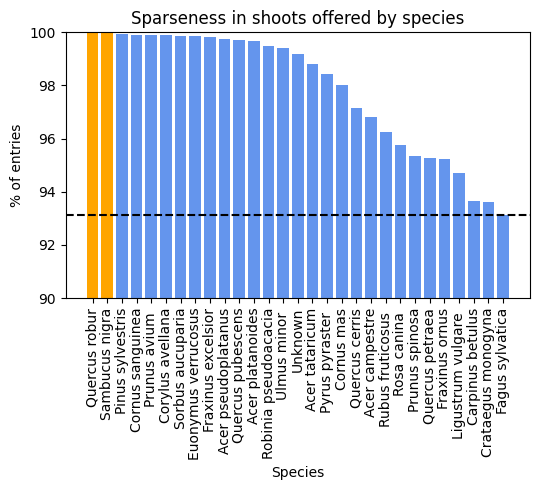

<Figure size 640x480 with 0 Axes>

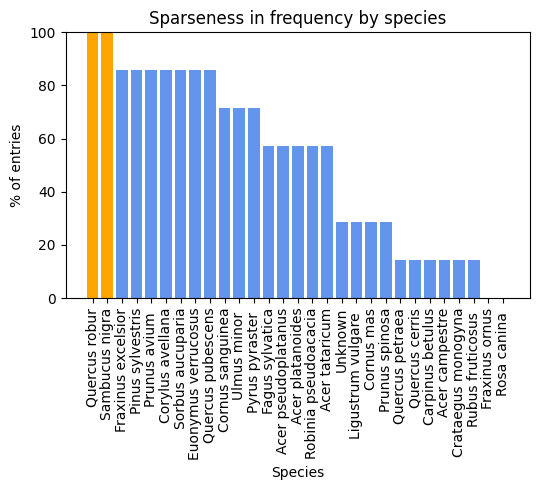

<Figure size 640x480 with 0 Axes>

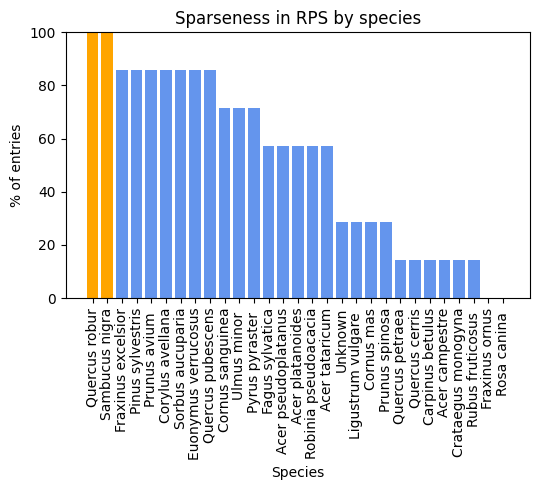

<Figure size 640x480 with 0 Axes>

In [5]:
features = [all_shoots, frequency, rps]
feature_names = ['shoots offered', 'frequency', 'RPS']

for i, feature in enumerate(features):
    # Collecting proportion of 0 values for each species in a list.
    zeros = [np.count_nonzero(feature[:,i] == 0) / rows for i in range(np.shape(feature)[1])]

    # Creating a sorted dictionary which stores the proportion of 0 values for each species.
    zeroDict = {key : value for key, value in \
                sorted({sp : zeroes for sp, zeroes in zip(species, zeros)}.items(), \
                       key=lambda item: item[1], reverse=True)}
    
    labels = list(zeroDict.keys())
    values = [i * 100 for i in list(zeroDict.values())]

    # Saving species which are not present at all:
    if feature_names[i] == 'shoots offered':
        not_present = [labels[i] for i, value in enumerate(values) if value == 100]

    fig, ax = plt.subplots(figsize=(5.5,5))
    
    ax.bar(labels, values, color=['orange' if value == 100 else 'cornflowerblue' for value in values])

    ax.set_xlabel('Species')
    ax.set_ylabel('% of entries')
    ax.set_title(f'Sparseness in {feature_names[i]} by species')

    if min(values) > 90.0:
        plt.ylim(90, 100)
    
    else:
        plt.ylim(0, 100)
    
    ax.set_xticklabels(labels, rotation=90)

    if min(values) > 0.0:
        plt.axhline(y=min(values), color='black', linestyle='--')

    plt.tight_layout()

    file_name = '_'.join(feature_names[i].split(' ')[:2]) 

    plt.savefig(f'./Figures/sparseness_{file_name}')

    plt.show()

    plt.clf()

[99.90476190476191, 99.90476190476191, 99.90476190476191, 100.0, 99.76190476190476, 99.66666666666667, 99.95238095238095, 100.0, 99.85714285714286, 99.85714285714286, 97.14285714285714, 99.80952380952381, 99.47619047619047, 99.71428571428571, 99.19047619047619, 99.42857142857143, 96.23809523809524, 98.80952380952381, 98.0, 98.42857142857143, 95.28571428571428, 96.80952380952381, 93.14285714285714, 95.23809523809523, 95.76190476190476, 93.61904761904762, 95.33333333333334, 93.66666666666667, 94.71428571428572]
[0.09523809523809523, 0.09523809523809523, 0.09523809523809523, 0.0, 0.2380952380952381, 0.33333333333333337, 0.047619047619047616, 0.0, 0.14285714285714285, 0.09523809523809523, 2.8095238095238098, 0.14285714285714285, 0.4761904761904762, 0.2380952380952381, 0.6190476190476191, 0.38095238095238093, 3.5238095238095237, 0.8571428571428572, 1.6190476190476188, 1.1428571428571428, 4.238095238095238, 2.666666666666667, 6.238095238095238, 3.9047619047619047, 3.3333333333333335, 5.42857

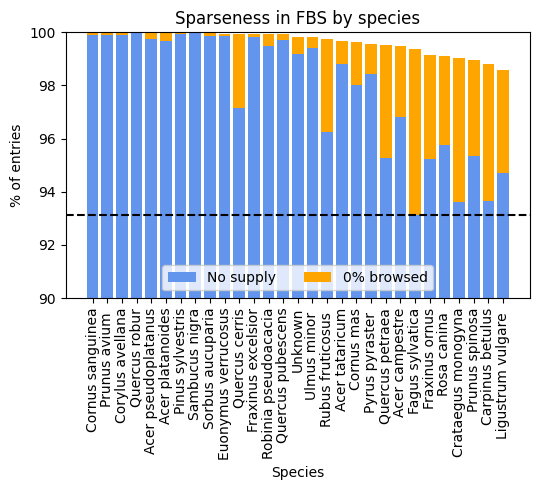

In [16]:
# Showing sparseness with distinction between 0 supply and 0% browsed for the target variable.
negatives = [np.count_nonzero(data_y_dist[:,i] < 0) / rows * 100 for i in range(np.shape(data_y_dist)[1])]
zeros = [np.count_nonzero(data_y_dist[:,i] == 0) / rows * 100 for i in range(np.shape(data_y_dist)[1])]
summed = [negatives[i] + zeros[i] for i in range(len(negatives))]

sorted_Dict = {key : value for key, value in \
                sorted({sp : sum for sp, sum in zip(species, summed)}.items(), \
                       key=lambda item: item[1], reverse=True)}

labels = list(sorted_Dict.keys())

sorted_negatives = []
sorted_zeros = []

for sp in labels:
    index = species.index(sp)

    sorted_negatives.append(negatives[index])
    sorted_zeros.append(zeros[index])

print(sorted_negatives)
print(sorted_zeros)

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5.5,5))

ax.bar(x, sorted_negatives, label='No supply', color='cornflowerblue')
ax.bar(x, sorted_zeros, bottom=sorted_negatives, label='0% browsed', color='orange')

# Set labels and title
ax.set_xlabel('Species')
ax.set_ylabel('% of entries')
ax.set_title('Sparseness in FBS by species')

# Set x-axis tick labels
ax.set_xticks(x, labels, rotation=90)

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=2)

plt.ylim(90, 100)

plt.axhline(y=min(negatives), color='black', linestyle='--')

plt.tight_layout()

plt.savefig(f'./Figures/sparseness_freshly_browsed')

# Show the plot
plt.show()

## Inspecting means and standard deviations

For each of the predictors and the predicted variable, a chart is created containing the means and std deviations of the variable for each of the species.

*Notes:*
* While the number of shoots offered is a non-negative integer variable on an unbound scale, all other variables are in the form of proportions between 0.0 and 1.0.
* The dashed horizontal line in the figures shows the mean of the mean/standard deviation across all species.

/var/folders/t3/fn5x2gps4wq728lxf9qrv_lm0000gn/T/ipykernel_11415/1676586871.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels1, rotation=90)
/var/folders/t3/fn5x2gps4wq728lxf9qrv_lm0000gn/T/ipykernel_11415/1676586871.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2, rotation=90)


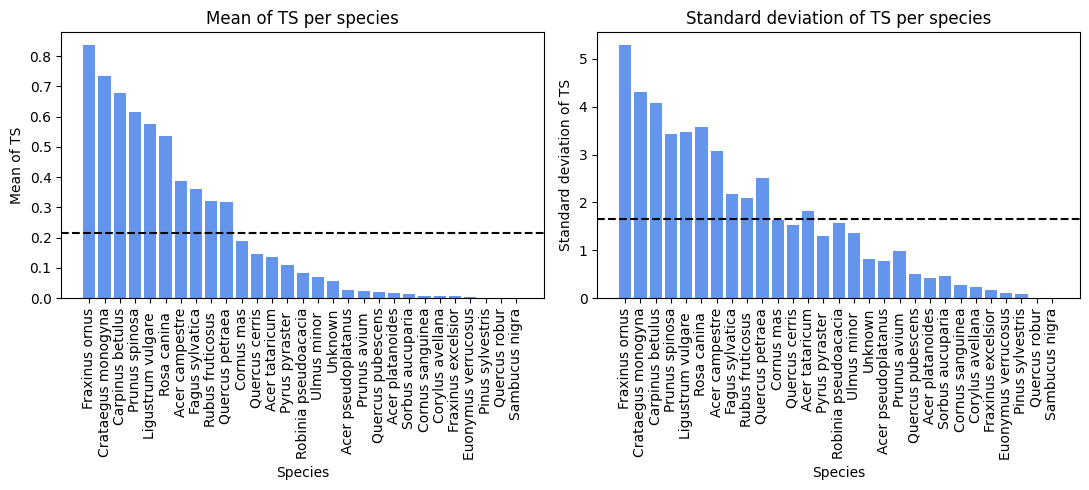

<Figure size 640x480 with 0 Axes>

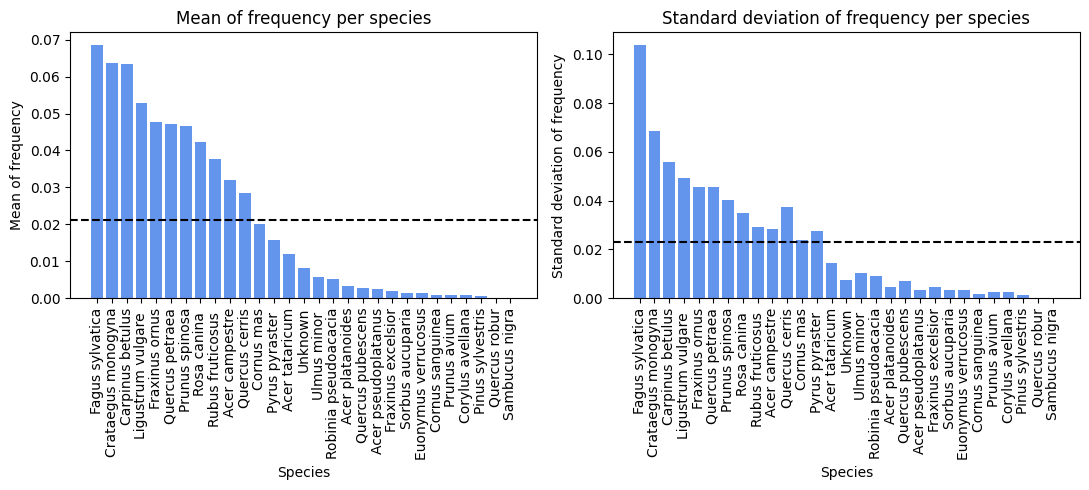

<Figure size 640x480 with 0 Axes>

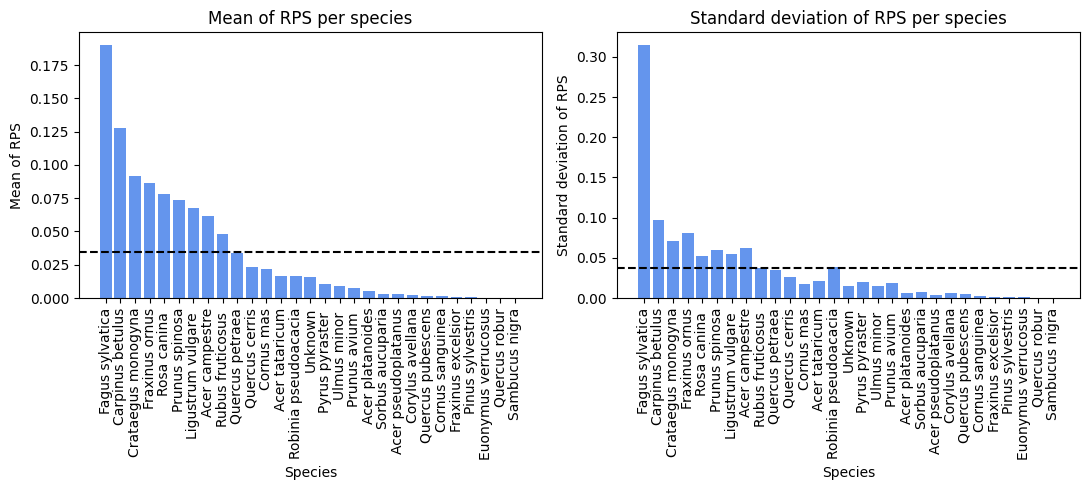

<Figure size 640x480 with 0 Axes>

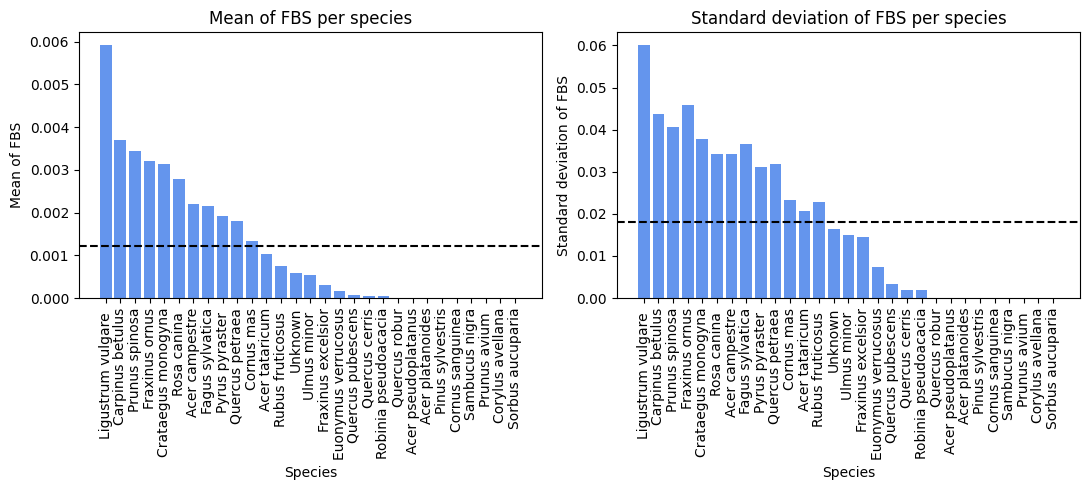

<Figure size 640x480 with 0 Axes>

In [8]:
features = [all_shoots, frequency, rps, data_y]
feature_names = ['TS', 'frequency', 'RPS', 'FBS']

for i, feature in enumerate(features):

       meanDict = {key:value for key, value in \
                       sorted({key:value for key, value in zip(species, np.mean(feature, axis=0).tolist())}.items(), \
                              key=lambda item: item[1], reverse=True)}

       sdDict = {key : value for key, value in zip(species, np.std(feature, axis=0).tolist())}

       #Ensuring that the two dictionaries are ordered identically.
       sdDict = {key : sdDict[key] for key in meanDict}

       labels1 = list(meanDict.keys())
       labels2 = list(sdDict.keys())
       values1 = list(meanDict.values())
       values2 = list(sdDict.values())

       bar_width = 0.35

       fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

       ax1.bar(labels1, values1, color='cornflowerblue')

       ax1.set_xlabel('Species')
       ax1.set_ylabel(f'Mean of {feature_names[i]}')
       ax1.set_title(f'Mean of {feature_names[i]} per species')
       ax1.set_xticklabels(labels1, rotation=90)

       ax1.axhline(y=np.mean(values1), color='black', linestyle='--')

       ax2.bar(labels2, values2, color='cornflowerblue')

       ax2.set_xlabel('Species')
       ax2.set_ylabel(f'Standard deviation of {feature_names[i]}')
       ax2.set_title(f'Standard deviation of {feature_names[i]} per species')
       ax2.set_xticklabels(labels2, rotation=90)

       ax2.axhline(y=np.mean(values2), color='black', linestyle='--')

       plt.tight_layout()

       file_name = '_'.join(feature_names[i].split(' ')[:2])

       plt.savefig(f'./Figures/mean_sd_{file_name}.png')

       plt.show()

       plt.clf()

## Inspecting number of species per sampling point

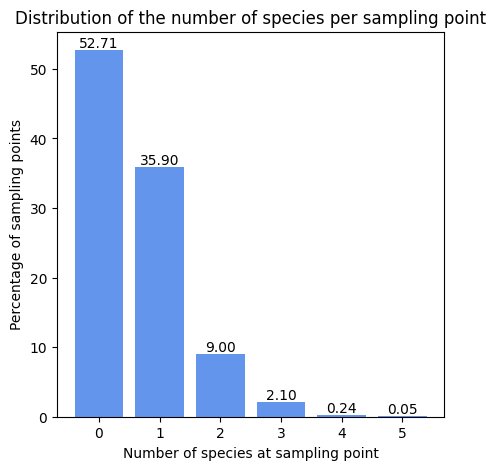

In [9]:
nr_species_perPoint = np.count_nonzero(all_shoots, axis=1)

hist_values, bin_edges = np.histogram(nr_species_perPoint, bins=np.arange(0, np.max(nr_species_perPoint) + 2))

hist_values = hist_values / rows * 100      # Turning frequencies into proportions.

fig, ax = plt.subplots(figsize=(5,5))

ax.bar_label(plt.bar(bin_edges[:-1], hist_values, align='center', width=0.8, color='cornflowerblue'), fmt='%.2f')

ax.set_xlabel('Number of species at sampling point')
ax.set_ylabel('Percentage of sampling points')
ax.set_title('Distribution of the number of species per sampling point')

plt.savefig(f'./Figures/nr_species_distribution.png')

plt.show()

## Showing species occuring together

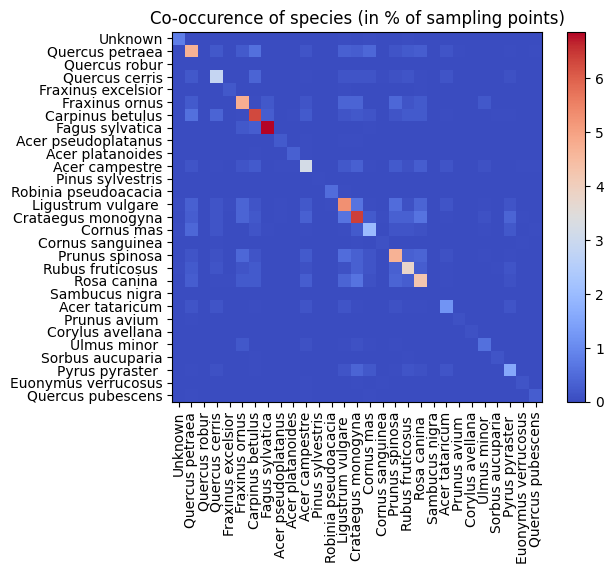

In [10]:
# Creating array showing whether a species is present or not (1/0) at a sampling point
all_shoots_binary = (all_shoots[1:] != 0).astype(int)

heatmap = np.dot(all_shoots_binary.T, all_shoots_binary) / rows * 100

plt.imshow(heatmap, cmap='coolwarm')

plt.xticks(np.arange(len(species)), species, rotation='vertical')
plt.yticks(np.arange(len(species)), species)

plt.title('Co-occurence of species (in % of sampling points)')

plt.colorbar()

plt.savefig(f'./Figures/heatmap')

plt.show()

## Additional data processing

Steps taken after inspection of the dataset.

### Removing species which do not occur in the dataset at all.

In [12]:
print(f'Species which do not occur in the dataset: {not_present}')

present_cols_X = [i for i in range(np.shape(dataset_X)[1]) if ' '.join(dataset_X[0, i].split(' ')[:-2]) not in not_present]
present_cols_y = [i for i in range(np.shape(dataset_y)[1]) if ' '.join(dataset_y[0, i].split(' ')[:-2]) not in not_present]

dataset_X_processed = dataset_X[:, present_cols_X]
dataset_y_processed = dataset_y[:, present_cols_y]
dataset_y_dist_processed = dataset_y_dist[:, present_cols_y]

print(f'Shape of processed predictors: {np.shape(dataset_X_processed)}')
print(f'Shape of processed target variables: {np.shape(dataset_y_dist_processed)} (DIST), {np.shape(dataset_y_processed)} (NO DIST)')

Species which do not occur in the dataset: ['Quercus robur', 'Sambucus nigra']
Shape of processed predictors: (2101, 81)
Shape of processed target variables: (2101, 27) (DIST), (2101, 27) (NO DIST)


In [13]:
np.savetxt('./Data/predictors_fl.csv', dataset_X_processed, delimiter=',', fmt='%s')
np.savetxt('./Data/freshly_browsed_fl.csv', dataset_y_processed, delimiter=',', fmt='%s')
np.savetxt('./Data/freshly_browsed_dist_fl.csv', dataset_y_dist_processed, delimiter=',', fmt='%s')

### Removing sampling points which do not have any species at all.

NOTE: this version of the dataset was not eventually used in the study as there was no apparent advantage for the performance of the ML models.

In [14]:
rows_withoutSpecies = [i + 1 for i in np.where(np.all(all_shoots == 0, axis=1))[0].tolist()]

rows_withSpecies = [i for i in range(len(dataset_X)) if i not in rows_withoutSpecies]

dataset_X_processed = dataset_X_processed[rows_withSpecies, :]
dataset_y_processed = dataset_y_processed[rows_withSpecies, :]
dataset_y_dist_processed = dataset_y_dist_processed[rows_withSpecies, :]

print(f'Shape of processed predictors: {np.shape(dataset_X_processed)}')
print(f'Shape of processed target variables: {np.shape(dataset_y_dist_processed)} (DIST), {np.shape(dataset_y_processed)} (NO DIST)')

Shape of processed predictors: (994, 81)
Shape of processed target variables: (994, 27) (DIST), (994, 27) (NO DIST)


In [15]:
np.savetxt('./Data/predictors.csv', dataset_X_processed, delimiter=',', fmt='%s')
np.savetxt('./Data/freshly_browsed.csv', dataset_y_processed, delimiter=',', fmt='%s')
np.savetxt('./Data/freshly_browsed_dist.csv', dataset_y_dist_processed, delimiter=',', fmt='%s')